In [4]:
# DataFrames と　CSV をインストールする
# using Pkg
# Pkg.add("DataFrames")
# Pkg.add("CSV")

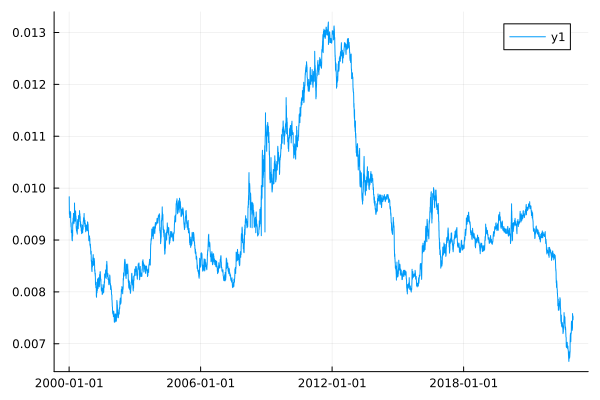

In [1]:
using DataFrames, CSV, Dates, Plots, DynamicalSystems


# CSVファイルを読み込む
df = CSV.read("../data/ex_rate/JPY_USD_2000-01-01_to_2022-12-30.csv", DataFrame)

# 欠損値を削除  
df = df[df.Close.!="null", :]

# Date列，Close列を取り出す
date = df.Date
close = df.Close

#　Date列(month/day/year)を日付型に変換，Close列を数値型に変換
date = Date.(date, "mm/dd/yyyy")
close = parse.(Float64, close)

plot(date, close)

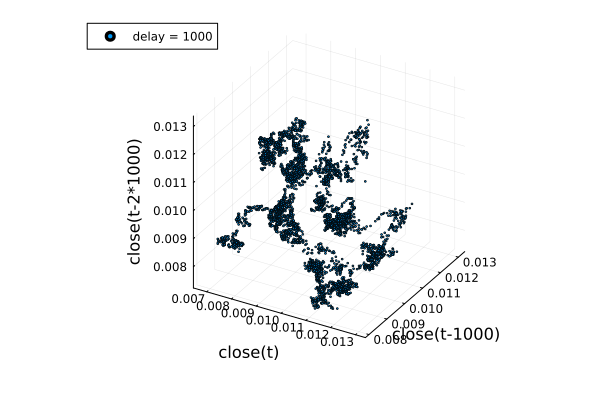

In [3]:
delay = 1000 # 適当なcloseの時間遅れ(日)
dim = 3 # 適当な埋め込み次元

# 時間遅れのデータを作成
data = zeros(length(close) - (dim - 1) * delay, dim)
for i = 1:dim
    data[:, i] = close[(dim-i)*delay+1:end-(i-1)*delay]
end

# プロット
if dim == 2
    scatter(data[:, 1], data[:, 2], markersize=1, label="delay = $delay", xlabel="close(t)", ylabel="close(t-$delay)", legend=:topleft)
else
    scatter(data[:, 1], data[:, 2], markersize=1, data[:, 3], label="delay = $delay", xlabel="close(t)", ylabel="close(t-$delay)", zlabel="close(t-2*$delay)", legend=:topleft)
end